# **Business Case: Yulu - Hypothesis Testing**

---






In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.simplefilter('ignore')

In [2]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import norm

from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import shapiro

from statsmodels.graphics.gofplots import qqplot

<u>**NumPy:**</u>

* NumPy is a powerful numerical computing library in Python.

<u>**Pandas:**</u>

* Pandas is a data manipulation and analysis library for Python

<u>**Seaborn:**</u>

* Seaborn is a statistical data visualization library based on Matplotlib.

<u>**Matplotlib:**</u>

* Matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python.

<u>**WorldCloud:**</u>

* WordCloud is a Python library used for creating word clouds, which are visual representations of text data.

**These libraries are often used together in data science and analysis workflows to handle, manipulate, and visualize data effectively.**

<u>**Scipy.stats:**</u>

* scipy.stats is submodule of the SciPy library, focusing on statistical functions and distributions.

<u>**ttest_1samp:**</u>
   - Conducts a t-test on the sample mean of one group and a population mean (or a specified value).

<u>**ttest_ind:**</u>
   - Performs an independent two-sample t-test to determine if the means of two independent samples are significantly different.

<u>**ttest_rel:**</u>
   - Conducts a paired sample t-test to compare the means of two related groups.

<u>**chisquare:**</u>
   - Performs a chi-square test of independence to determine if there is a significant association between two categorical variables.

<u>**chi2:**</u>
   - Computes the chi-square statistic and p-value for the given data.

<u>**chi2_contingency:**</u>
   - Computes the chi-square statistic and p-value for the independence of variables in a contingency table.

<u>**norm:**</u>
   - Represents a normal continuous random variable.

<u>**f_oneway:**</u>
   - Performs one-way ANOVA (analysis of variance) to determine if there are statistically significant differences between the means of three or more independent groups.

<u>**levene:**</u>
   - Performs Levene's test for the equality of variances across multiple groups.

<u>**kruskal:**</u>
    - Performs the Kruskal-Wallis H-test to determine if there are statistically significant differences between the medians of three or more independent groups.

<u>**shapiro:**</u>
    - Performs the Shapiro-Wilk test to determine if a sample comes from a normal distribution.

<u>**qqplot:**</u>
    - Generates a QQ (quantile-quantile) plot to visually assess whether two sets of data come from populations with a common distribution.

**These functions are essential tools for conducting various statistical tests and analyses in Python, covering a wide range of scenarios in scientific research, data analysis, and machine learning**



In [3]:
!gdown '1sH9JVo1jIeDaTkBV3Vgic8R7dG7x4i-F'

Downloading...
From: https://drive.google.com/uc?id=1sH9JVo1jIeDaTkBV3Vgic8R7dG7x4i-F
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 5.00MB/s]


In [4]:
df=pd.read_csv('bike_sharing.csv')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# <font color="red">**1. Exploratory Data Analysis**

---



## **Examine dataset structure, characteristics, and statistical summary**

In [6]:
df.shape

(10886, 12)

* **Obsevation:**
  * **12 Columns**
  * **10886 Rows**



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* **Observation:**
  *   We can see 3 Type of Data types.
  * <u>**Object**</u>- Holds addresses that refer to objects. You can assign any reference type (string, array, class, or interface) to an Object variable. An Object variable can also refer to data of any value type (numeric, Boolean, Char, Date, structure, or enumeration).
  * <u>**Int64**</u>- The type int64 tells us that Python is storing each value within this column as a 64 bit integer. Holds signed 64-bit (8-byte) integers that range in value from -9223372036854775808 to 9223372036854775807.
  * <u>**Float64**</u>- It is a floating-point number.This data type represents a real number with double precision.It uses 64 bits (or 8 bytes) of memory to store the number.It allows for a wide range of values with high precision from -1.7e+308 to +1.7e+308.

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## **Identify missing values and perform Imputation using an appropriate method.**

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* **Obsevation:**
  * Dataset Have **no null values**.

## **Identify and remove duplicate records.**

In [10]:
df.duplicated().sum()

0

* **Obsevation:**
  * Dataset has **Zero(0) duplicates**.

## **Analyze the distribution of Numerical & Categorical variables, separately**

In [11]:
columns=['datetime',"season","holiday","workingday","weather",'temp','atemp','humidity', 'windspeed','casual','registered','count']
for cat in columns:
    print('unique',cat,':-',df[cat].nunique())

unique datetime :- 10886
unique season :- 4
unique holiday :- 2
unique workingday :- 2
unique weather :- 4
unique temp :- 49
unique atemp :- 60
unique humidity :- 89
unique windspeed :- 28
unique casual :- 309
unique registered :- 731
unique count :- 822


* **Observation: Unique Values:**
  * unique datetime :- 10886
  * unique season :- 4
  * unique holiday :- 2
  * unique workingday :- 2
  * unique weather :- 4
  * unique temp :- 49
  * unique atemp :- 60
  * unique humidity :- 89
  * unique windspeed :- 28
  * unique casual :- 309
  * unique registered :- 731
  * unique count :- 822


### **Numerical Variables**

# Column:- temp

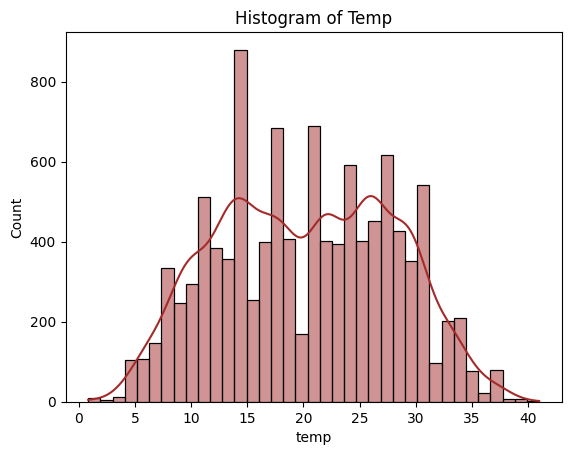

In [12]:
#fig = plt.figure(figsize=(10,5))
sns.histplot(data=df,x='temp',kde=True, color='brown')
plt.title("Histogram of Temp")
plt.show()

# Column:- atemp

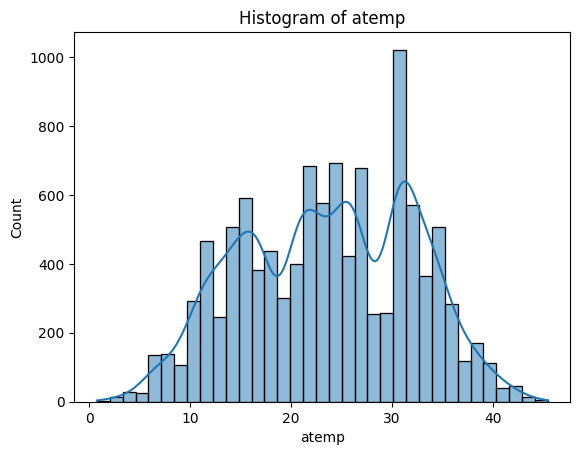

In [13]:
sns.histplot(data=df,x='atemp',kde=True)
plt.title("Histogram of atemp")
plt.show()

# Column:- humidity

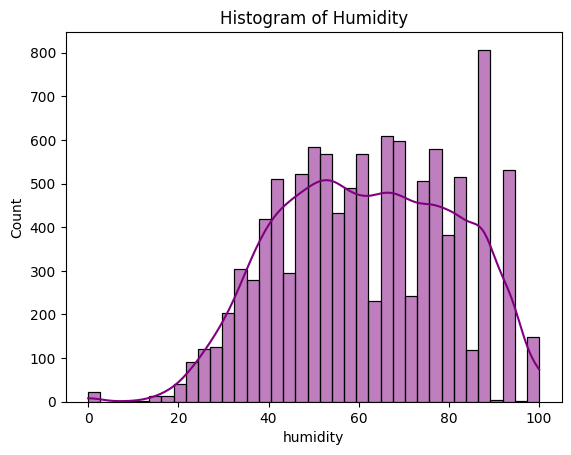

In [14]:
sns.histplot(data=df,x='humidity',kde=True, color='purple')
plt.title("Histogram of Humidity")
plt.show()

# Column:- windspeed

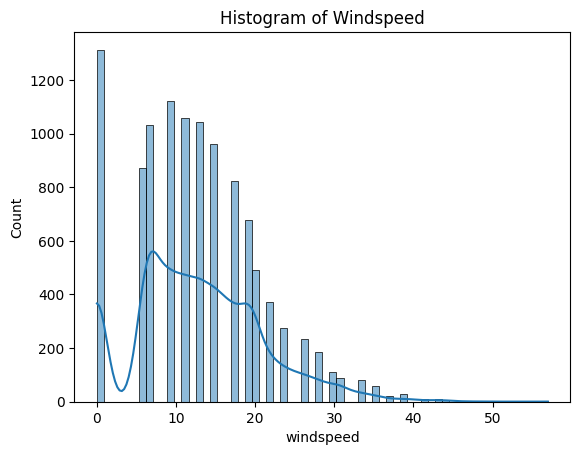

In [15]:
sns.histplot(data=df,x='windspeed',kde=True)
plt.title("Histogram of Windspeed")
plt.show()

# Column:- casual

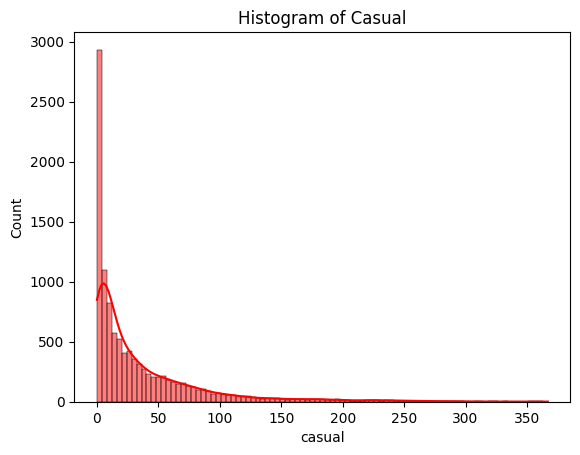

In [16]:
sns.histplot(data=df,x='casual',kde=True, color='red')
plt.title("Histogram of Casual")
plt.show()

# Column:- registered

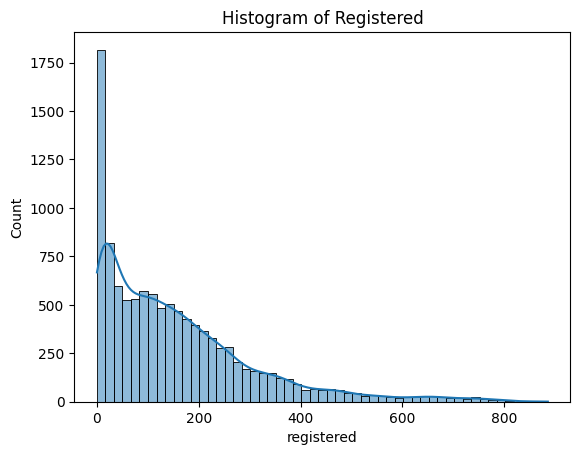

In [17]:
sns.histplot(data=df,x='registered',kde=True)
plt.title("Histogram of Registered")
plt.show()

Column:- count

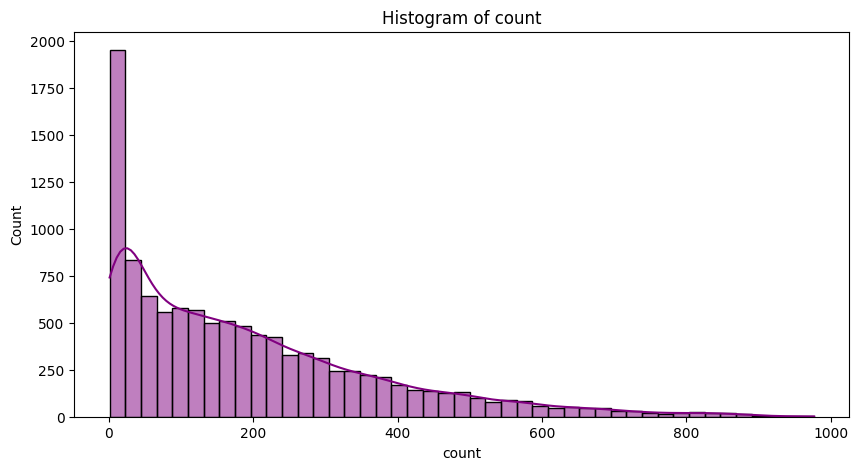

In [18]:
fig = plt.figure(figsize=(10,5))
sns.histplot(data=df,x='count',kde=True,color='purple')
plt.title("Histogram of count")
plt.show()

* **Observation:**
  * **casual, registered and count** somewhat looks like **Log Normal Distrinution**
  * **temp, atemp and humidity** looks like they follows the **Normal Distribution**
  * **windspeed** follows the **binomial distribution**

### **Categorical Variables**

# Column:- season

In [19]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

* Obsevation:
  * season (1: spring, 2: summer, 3: fall, 4: winter)

|NO.| Season| Count|
|---|-------|------|
|1  |spring |2686  |
|2  |summer |2733  |
|3  |fall   |2733  |
|4  |winter |2734  |

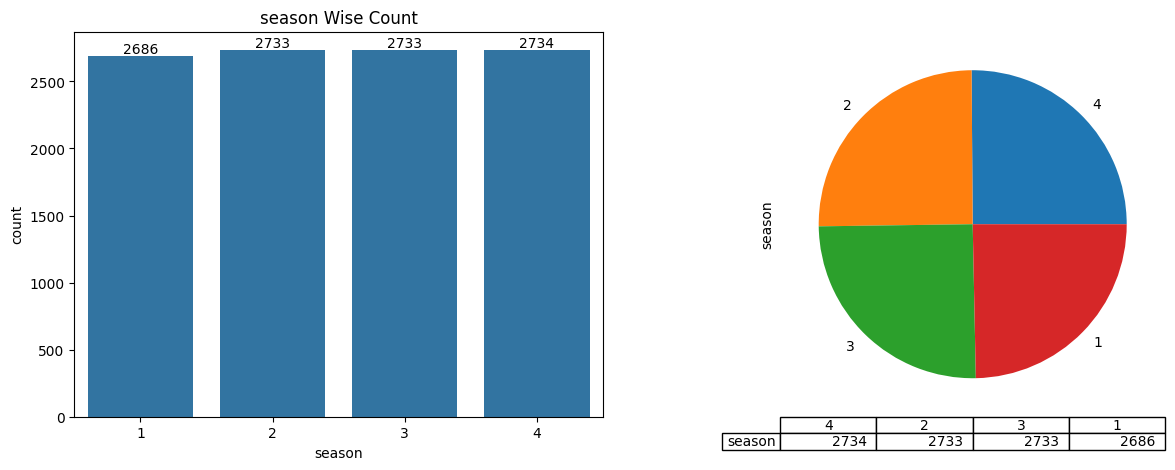

In [20]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax= sns.countplot(data=df,x='season')
ax.bar_label(ax.containers[0])
plt.title("season Wise Count")
plt.subplot(1, 2, 2)
df['season'].value_counts().plot(kind ='pie', stacked = True, table=True )
plt.show()

# Column:- holiday

In [21]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

* **Observation:**
  * **1 --> Its is a Holiday**. Dataset has 311 days as Holiday.
  * **0 --> Its is not a Holiday**. Dataset has 10575 days as not Holiday.

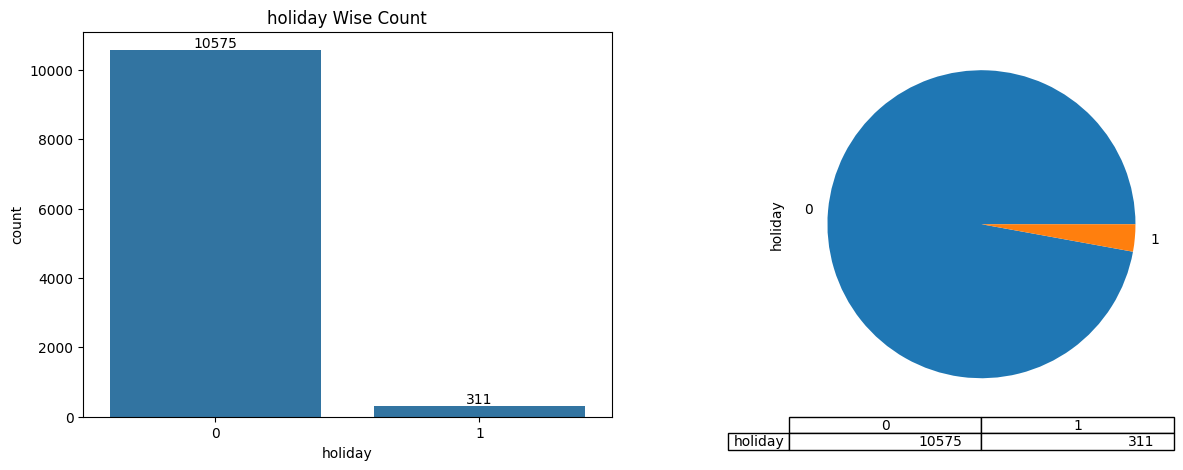

In [22]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax= sns.countplot(data=df,x='holiday')
ax.bar_label(ax.containers[0])
plt.title("holiday Wise Count")
plt.subplot(1, 2, 2)
df['holiday'].value_counts().plot(kind ='pie', stacked = True, table=True )
plt.show()

# Column:- workingday

In [23]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

* **Observation:**
  * **1 --> Its is a Workingday**. Dataset has 7412 days as Workingday.
  * **0 --> Its is not a Workingday**. Dataset has 3474 days as not Workingday.

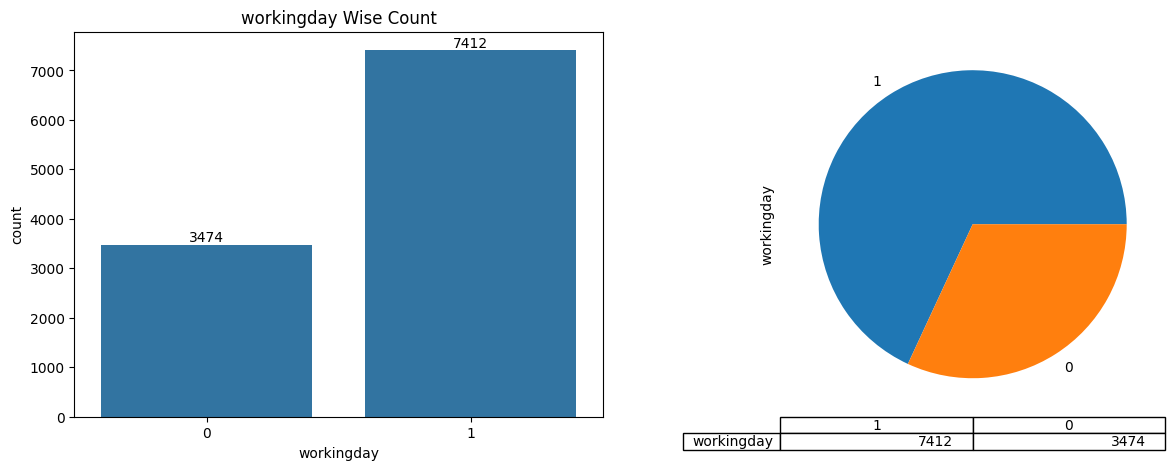

In [24]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax= sns.countplot(data=df,x='workingday')
ax.bar_label(ax.containers[0])
plt.title("workingday Wise Count")
plt.subplot(1, 2, 2)
df['workingday'].value_counts().plot(kind ='pie', stacked = True, table=True )
plt.show()

# Column:- weather

In [25]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

* **Observation: **
  * weather:
      * 1 --> Clear, Few clouds, partly cloudy
      * 2 --> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      * 3 --> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rai + Scattered clouds
      * 4 --> Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog


| No. | Weather | Count |
|---|---|---|
| 1 |Clear, Few clouds, partly cloudy|7192|
| 2 |Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|2834|
| 3 |Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rai + Scattered clouds|859|
| 4 |Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog|1|

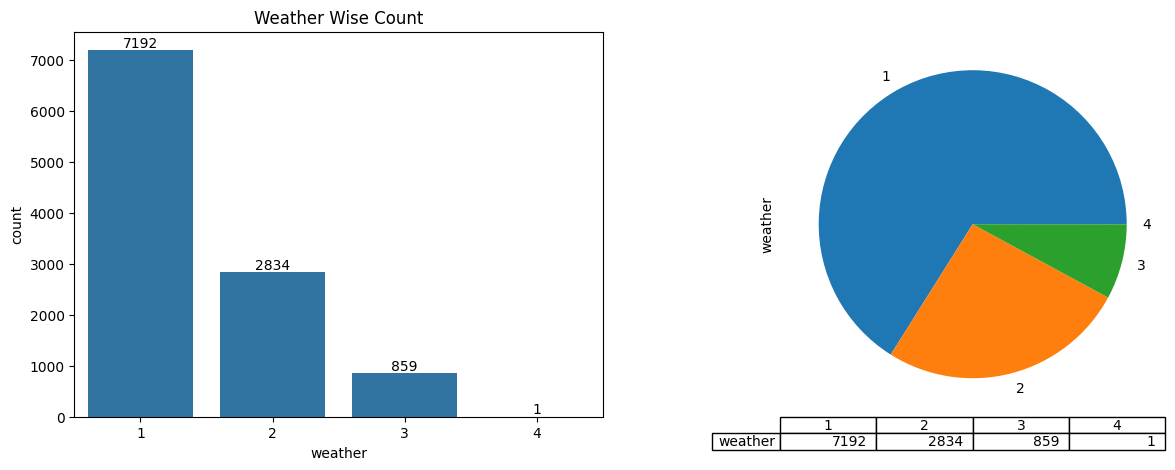

In [26]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax= sns.countplot(data=df,x='weather')
ax.bar_label(ax.containers[0])
plt.title("Weather Wise Count")
plt.subplot(1, 2, 2)
df['weather'].value_counts().plot(kind ='pie', stacked = True, table=True )
plt.show()

* **Obsevation:**
  * Data looks common as it should be like **equal number of days in each season**, **more working days** and **weather is mostly Clear, Few clouds, partly cloudy, partly cloudy**.

## **Check for Outliers and deal with them accordingly.**

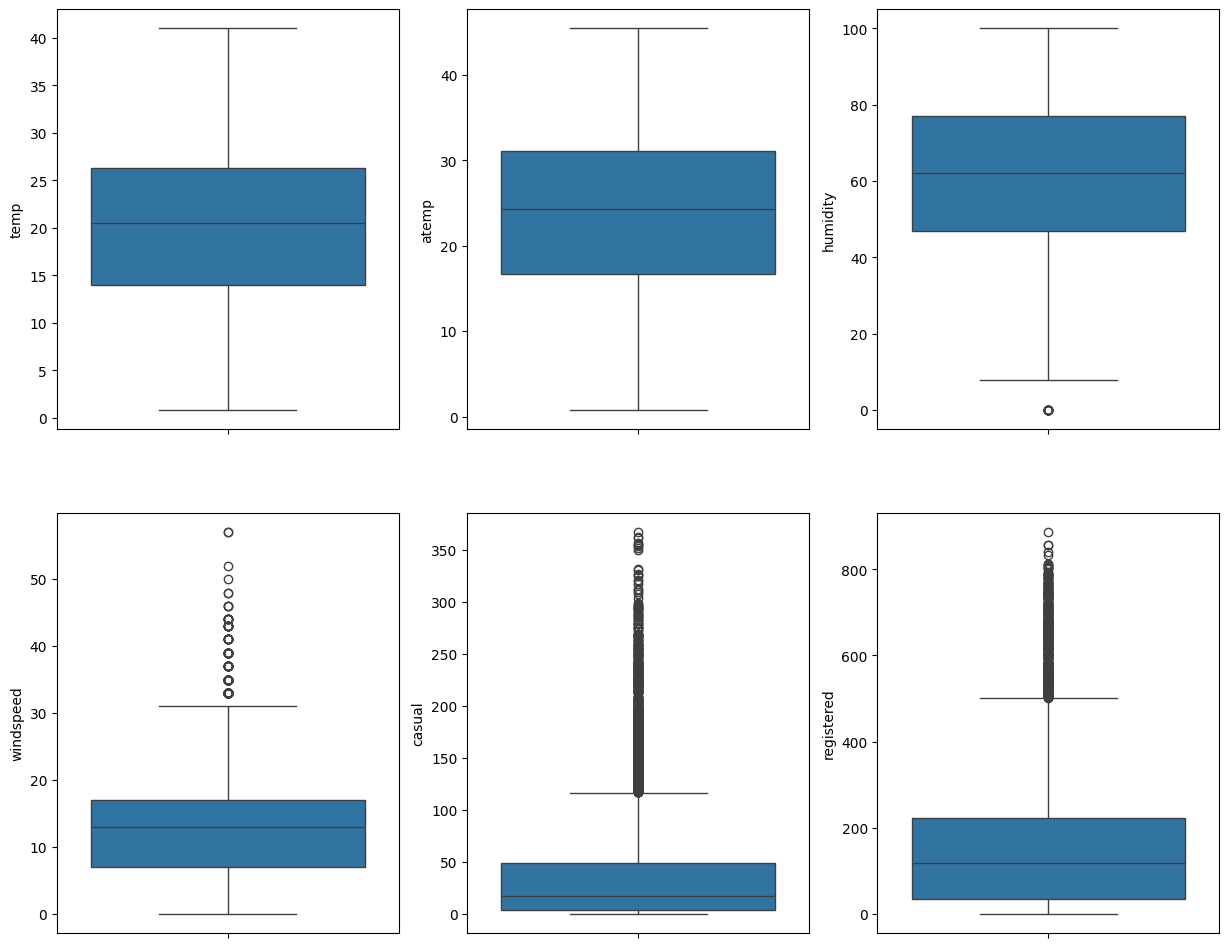

In [27]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(15,12))
index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(y=df[columns_cat[index]],ax=axis[row,col])
    index += 1
plt.show()


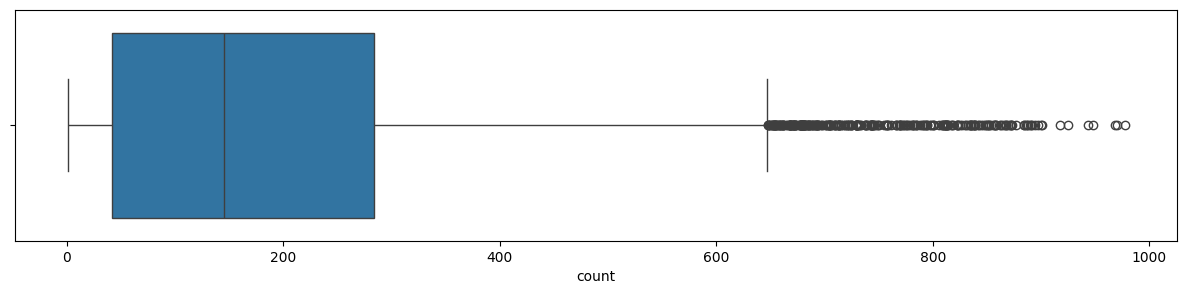

In [28]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,3))
sns.boxplot(x=df[columns_cat[-1]])
plt.show()

* **Assumption:**
* When should I remove an outlier from my dataset?
    * It's best to remove outliers only when you have a sound reason for doing so.
    * Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called **true outliers**.
    * **Other outliers are problematic** and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

* **Observation:**
  * **Looks like humidity, casual, registered and count have outliers in the data.**
  * Here, We don't find any Problematic Outlies. All are true Outliers.
  * **Removing or clipping data will create the wrong results.**

# <font color="red">**2. Relationship between the Dependent and Independent Variables.**

---



In [29]:
columns_num=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
columns_cat=['season','holiday','workingday','weather']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


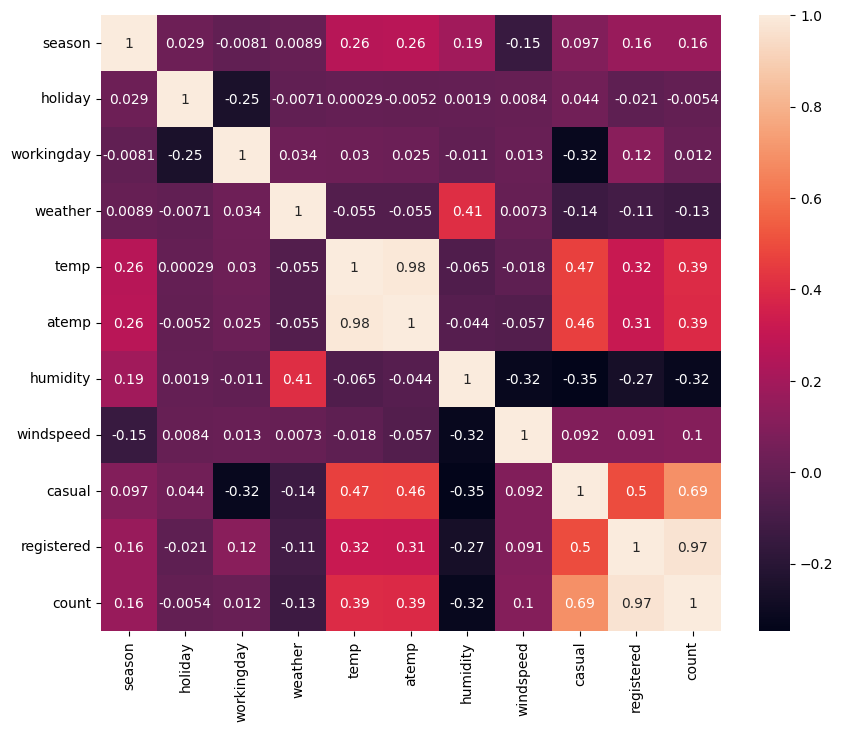

In [31]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [32]:
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [33]:
pd.crosstab(df["workingday"],df["weather"])

weather,1,2,3,4
workingday,,,,
0,2353,897,224,0
1,4839,1937,635,1


* **Observation:**
  * Most No. of woriking days are Clear, Few clouds, partly cloudy.
  * Most No. of no working days are also Clear, Few clouds, partly cloudy.

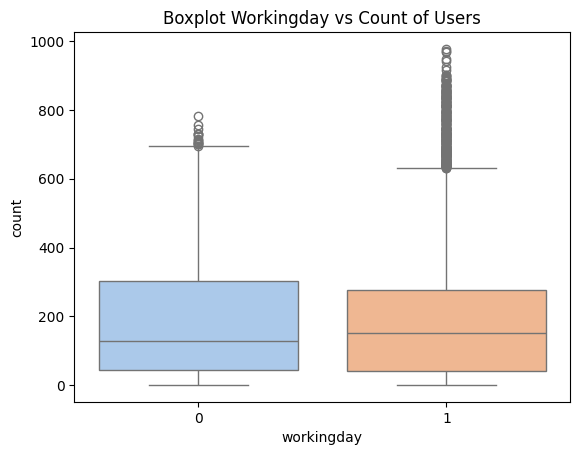

In [34]:
sns.boxplot(data=df,x="workingday",y="count", palette='pastel')
plt.title('Boxplot Workingday vs Count of Users')
plt.show()

In [35]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()

,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


* **Observation:**
  * **Mostly Bike is Rented on Workingday.**
    * Most Bike is Rented by **Registered User on Workingday**.
  * Also on Holiday or weekend Registered User are renting bike more.
  * **Only in one case**: On weekends or holidays, casual users rent more bikes than on working days.

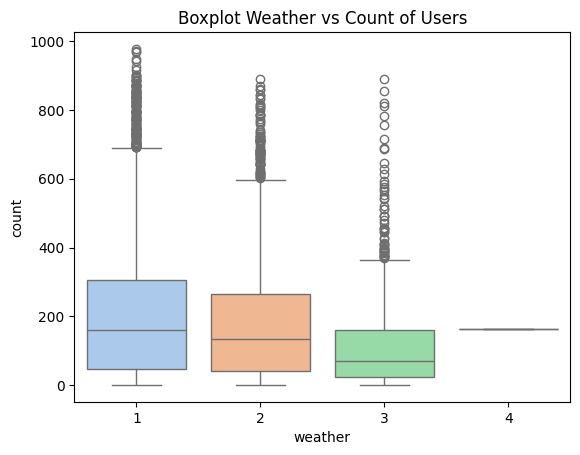

In [36]:
sns.boxplot(data=df,x="weather",y="count", palette='pastel')
plt.title('Boxplot Weather vs Count of Users')
plt.show()

In [37]:
df.groupby(["weather"])[["casual","registered","count"]].sum()

,casual,registered,count
weather,,,
1,289900,1186163,1476063
2,87246,419914,507160
3,14983,87106,102089
4,6,158,164


* **Observation:**
  * **Mostly on Clear, Few clouds and partly cloudy User are renting bikes**.
    * **Registered** users are renting most.
  * Causal users mostly are also renting bike on Clear, Few clouds and partly cloudy day.

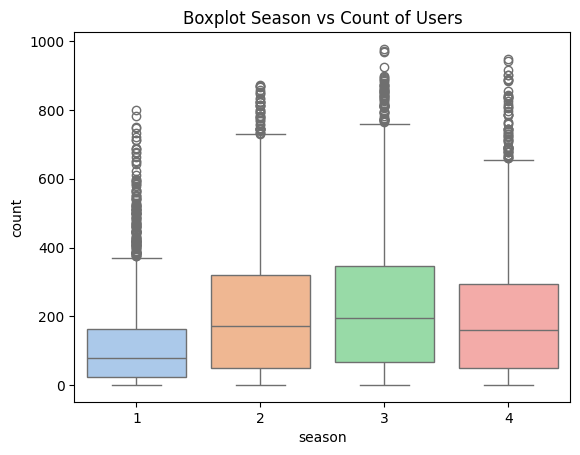

In [38]:
sns.boxplot(data=df,x="season",y="count", palette='pastel')
plt.title('Boxplot Season vs Count of Users')
plt.show()

In [39]:
df.groupby(["season"])[["casual","registered","count"]].sum()

,casual,registered,count
season,,,
1,41605,270893,312498
2,129672,458610,588282
3,142718,497944,640662
4,78140,465894,544034


* **Obsevation:**
  * **Users are mostly renting bike in Fall season**.
  * **Second is Summer then winter**.
    * Mostly Registered users are renting bike.
  * I case of Causal Users: They also follow same pattern Fall season the most then summer and then winter.
  * **Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented**.

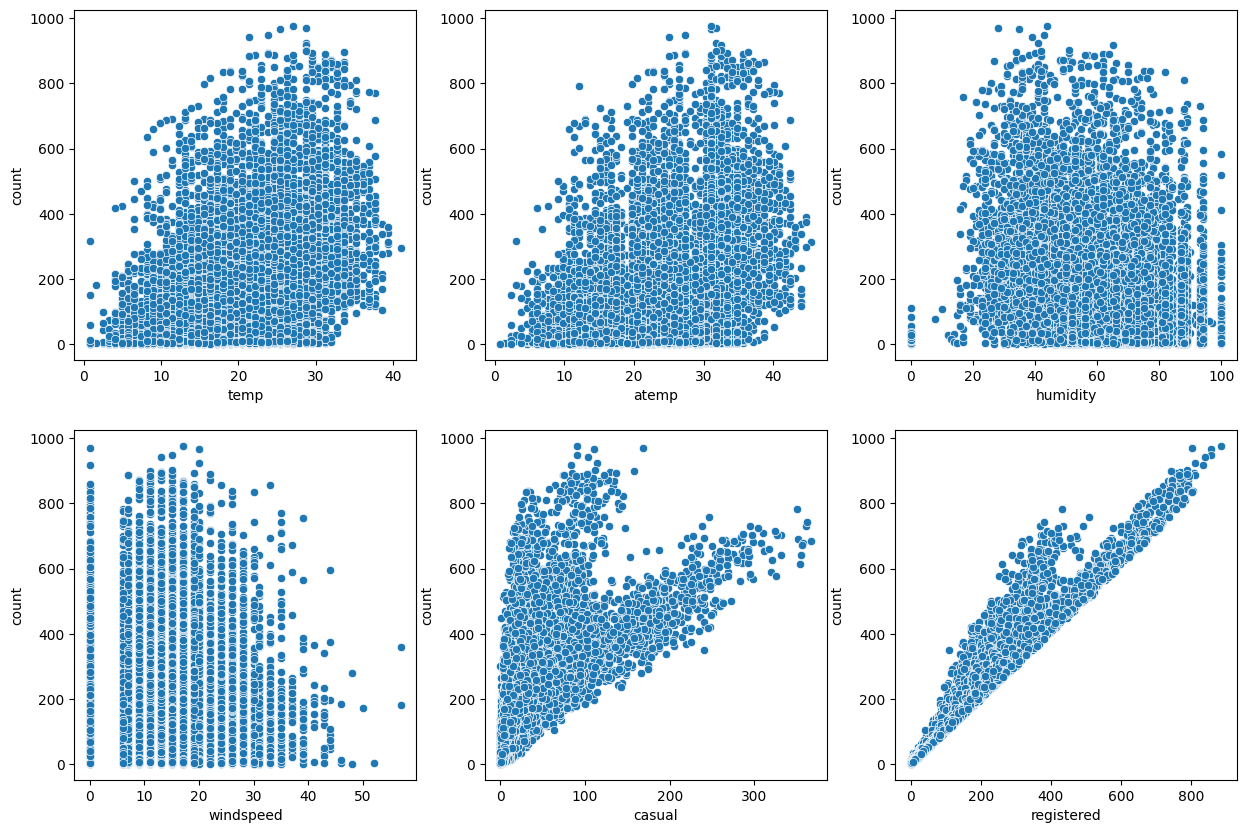

In [40]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=columns_num[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* **Observation:**
  * Whenever the **humidity is less than 20**, number of **bikes rented is very very low**.
  * Whenever the **temperature is less than 10**, number of **bikes rented is less**.
  *  Whenever the **feeling temperature is less than 12**, number of **bikes rented is less**.
  * Whenever the **windspeed is greater than 35**, number of **bikes rented is less**.

# <font color="red">**3. if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

---




## **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**(NULL Hypothesis) Ho** : **Bike rides on Weekdays and Weekends are same.** (Working Day has no effect on bike rentals)

**(Alternative Hypothesis) Ha** : **Bike rides on Weekdays and Weekends are different.** (Working day has effect on bike rentals)

## **Select an appropriate test**

* Data is numerical vs categorical, and how dependent each category(week day, weekend) on the Ride(Rental).
* We will do **Sample Independent T-test**.

## **Set a significance level**

* alpha=5% (significance level alpha)
* $\alpha$ = 0.05

## **Calculate test Statistics / p-value**

In [41]:
workingday = df[df['workingday']== 1]['count']
weekend = df[df['workingday']== 0]['count']

tvalue,pvalue=ttest_ind(workingday,weekend)
alpha=0.05

print('alpha-value=',alpha,'t-value=',tvalue,'pvalue=',pvalue)

if pvalue<alpha:
  print("Result : Reject null hypothesis")
else:
  print("Result : Fail to reject null hypothesis")

alpha-value= 0.05 t-value= 1.2096277376026694 pvalue= 0.22644804226361348
Result : Fail to reject null hypothesis


## **Decide whether to accept or reject the Null Hypothesis.**

* **Assumption:**
  1. If the **p-value is less than or equal to** the predetermined **level of significance (alpha)**, **we have evidence to reject the null hypothesis**
  2. If the **p-value is greater than** the predetermined **level of significance (alpha)**, **we do not have sufficient evidence to reject the null hypothesis**.
* **Observation:**
  * As we can see **P-value is greater then Alpha**. **We fail to reject Null**. hypothesis.
  * **We don't have the sufficient evidence to say that workingday and Weekend has effect on the number of cycles being rented**.


## **Draw inferences & conclusions from the analysis and provide recommendations.**

* **Inference:**
  * As we can see P-value is greater then Alpha. We fail to reject Null. hypothesis.
  * We don't have the sufficient evidence to say that workingday and Weekend has effect on the number of cycles being rented.
  * **Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.**

# <font color="red">**4. Check if the demand of bicycles on rent is the same for different Weather conditions?**

---




## **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**Ho : Weather Conditions has no effect on bike rentals**

**Ha: Weather Conditions has effect on bike rentals**

## **Select an appropriate test**

* The data we work is **Numerical vs 4 categorical(4 Weathers)**, and how dependent rentals on each weather category
* Appropriate test:- **One-way ANOVA test**

## **Check assumptions of the test**

* **Assumption: Anova**
  1. **Variance within each group should almost the same.**
  2. **The target on which we are computing the average should be normally distribution.**
### **When both assumptions follow, Then only we can apply the one-way ANOVA test.**

## **Normality**


In [42]:
w1=df[df['weather']==1]['count']
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

## Weather 1: Clear, Few clouds, partly cloudy

### **1. QQ-plot**

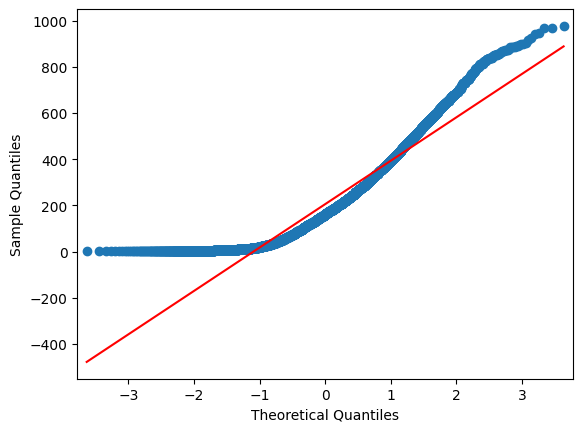

In [43]:
qqplot(w1, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**


In [64]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(w1.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 1.0349310741730733e-06 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Weather 1: Clear, Few clouds, partly cloudy is **not Normally Distributed**.
   

## Weather 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

### **1. QQ-plot**

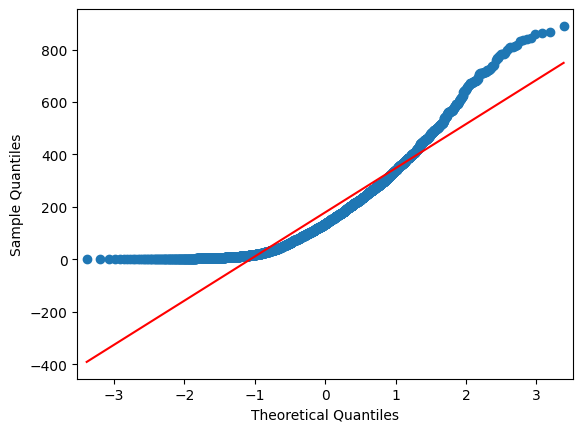

In [45]:
qqplot(w2, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**

In [63]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(w2.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 2.4596462822046306e-07 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Weather 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist is **not Normally Distributed**.

## Weather 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### **1. QQ-plot**

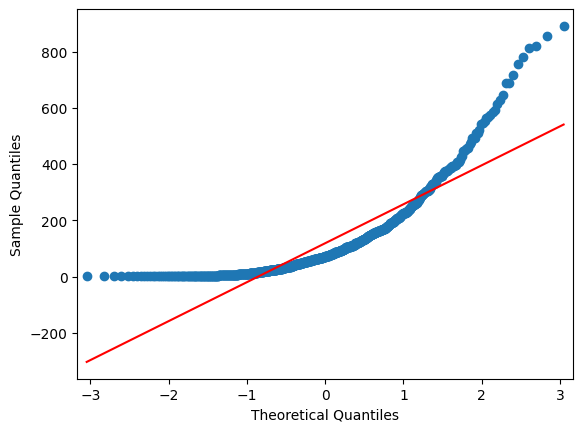

In [47]:
qqplot(w3, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**

In [62]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(w3.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 2.28260899071131e-09 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Weather 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is **not Normally Distributed**.

## Weather 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

### **1. QQ-plot**

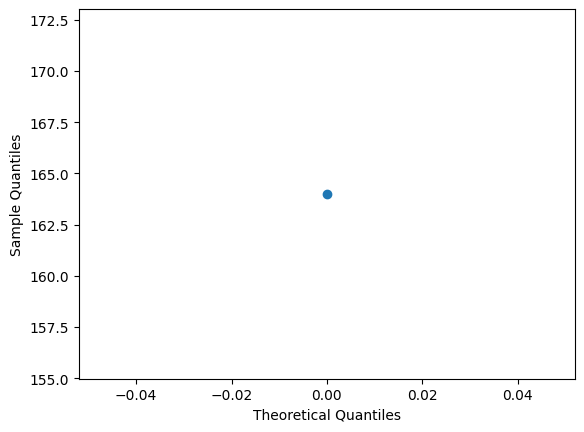

In [49]:
qqplot(w4, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its have only 1 point.
  * **We will not further include Weather 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.**
  * **We will test further only on Weather 1,2 and 3.**

## **2. Equality Variance**

### **Levene’s test**

In [50]:
# H0: Variance are same
# H1: Variance are different

sstat,pvlaue=levene(w1, w2, w3)
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Variance are different)")
else:
  print("Result : Fail to reject null hypothesis(Variance are same)")

p-value= 5.877266989057217e-13 alpha= 0.05
Result : Reject null hypothesis(Variance are different)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * **Variance of different for Weather 1, 2 and 3**.

* **Assumption: Anova**
  * Variance within each group should almost the same.
  * The target on which we are computing the average should be normally distribution.
* **Observation:**
  * **Weather 1,2 and 3 have different Variance.**
  * **In Weathers 1, 2, and 3, no one is normally  distributed.**
### **Both assumptions do not follow. So, we cannot apply the one-way ANOVA test.**

### **IF THE ASSUMPTIONS OF ANOVA DOESN'T MET, WE USE KRUSKAL WALLIS TEST. Which is same as ANOVA but we use it in case the assumtions are not met for ANOVA**

## **KRUSKAL WALLIS TEST**

In [71]:
#Ho : Weather Conditions has no effect on bike rentals
#Ha: Weather Conditions has effect on bike rentals

sstat,pvlaue = kruskal(w1, w2, w3)
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Weather Conditions has effect on bike rentals)")
else:
  print("Result : Fail to reject null hypothesis(Weather Conditions has no effect on bike rentals)")


p-value= 8.225513852266886e-07 alpha= 0.05
Result : Reject null hypothesis(Weather Conditions has effect on bike rentals)


* ## **Insights**
  * significance level alpha=5%
  * $\alpha$ = 0.05
  * If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
  * If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* **Observation:**
  * **Reject null hypothesis**.
  * **Weather Conditions has effect on bike rentals**.

## **Inferences & Conclusions**
* **Weather Conditions has effect on bike rentals.**
* Its observed that whenever there is Clear, Few clouds, partly cloudy the bike rental is more in comparison to other weather conditions.71 % of rentals happened during Clear, Few clouds, partly cloudy weather.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

# <font color="red">**5. Check if the demand of bicycles on rent is the same for different Seasons?**

---



## **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**Ho : Season has no effect on bike rentals**

**Ha: Season has effect on bike rentals**

## **Select an appropriate test**

* The data we work is **Numerical vs 4 categorical(4 Season)**, and how dependent rentals on each weather category
* Appropriate test:- **One-way ANOVA test**

## **Check assumptions of the test**

* **Assumption: Anova**
  1. **Variance within each group should almost the same.**
  2. **The target on which we are computing the average should be normally distribution.**
### **When both assumptions follow, Then only we can apply the one-way ANOVA test.**

## **Normality**


In [52]:
s1=df[df['season']==1]['count']
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']

## Season 1: Spring

### **1. QQ-plot**

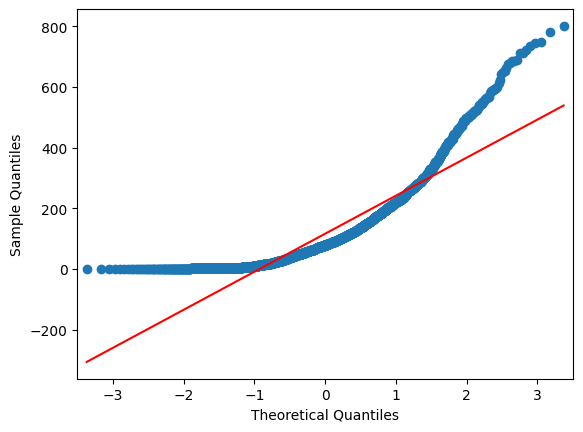

In [53]:
qqplot(s1, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**


In [61]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(s1.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 3.3699587564939293e-09 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Season 1: Spring is **not Normally Distributed**.
   

## Season 2: Summer

### **1. QQ-plot**

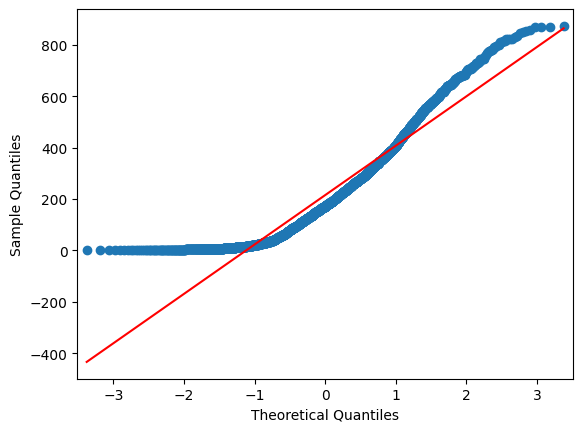

In [58]:
qqplot(s2, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**

In [60]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(s2.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 3.7661584428860806e-06 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Season 2: Summer is **not Normally Distributed**.

## Season 3: Fall

### **1. QQ-plot**

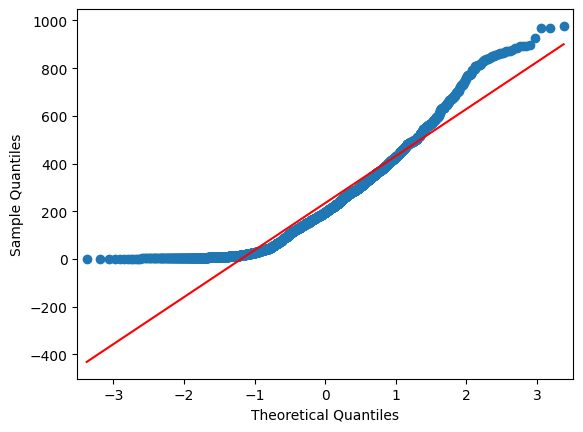

In [65]:
qqplot(s3, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**

In [66]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(s3.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 1.2373335266602226e-05 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Season 3: Fall is **not Normally Distributed**.

## Weather 4: Winter

### **1. QQ-plot**

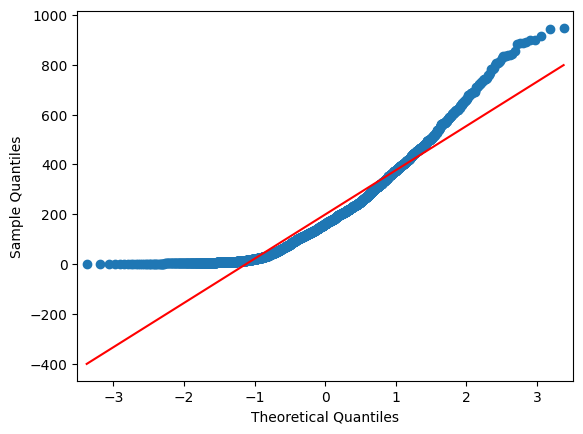

In [67]:
qqplot(s4, line = 's')
plt.show()

* **Observation:**
  * By seeing QQ-plot its **not look like Normally Distributed**.

### **2. Shapiro-Wilk test**

In [68]:
# H0: Data is normally distributed
# H1: Data is not normally distributed.

sstat,pvalue=shapiro(s4.sample(100))
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Data is not normally  distributed)")
else:
  print("Result : Fail to reject null hypothesis(Data is normally distributed)")

p-value= 8.225513852266886e-07 alpha= 0.05
Result : Reject null hypothesis(Data is not normally  distributed)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * Season 4: Winter is **not Normally Distributed**.

## **2. Equality Variance**

### **Levene’s test**

In [69]:
# H0: Variance are same
# H1: Variance are different

sstat,pvlaue=levene(s1, s2, s3, s4)
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Variance are different)")
else:
  print("Result : Fail to reject null hypothesis(Variance are same)")

p-value= 8.225513852266886e-07 alpha= 0.05
Result : Reject null hypothesis(Variance are different)


* **Observation:**
  * **P-value is smaller then alpha value so we reject null**.
  * **Variance of different for Season 1, 2, 3 and 4**.

* **Assumption: Anova**
  * Variance within each group should almost the same.
  * The target on which we are computing the average should be normally distribution.
* **Observation:**
  * **Seasons 1, 2, 3 and 4 have different Variance.**
  * **In Seasons 1, 2, 3 and 4 not one is normally disturbed.**
### **Both assumptions do not follow. So, we cannot apply the one-way ANOVA test.**

### **IF THE ASSUMPTIONS OF ANOVA DOESN'T MET, WE USE KRUSKAL WALLIS TEST. Which is same as ANOVA but we use it in case the assumtions are not met for ANOVA**

## **KRUSKAL WALLIS TEST**

In [70]:
#Ho : Seasons has no effect on bike rentals
#Ha: Seasons has effect on bike rentals

sstat,pvlaue = kruskal(s1, s2, s3, s4)
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Seasons has effect on bike rentals)")
else:
  print("Result : Fail to reject null hypothesis(Seasons has no effect on bike rentals)")


p-value= 8.225513852266886e-07 alpha= 0.05
Result : Reject null hypothesis(Seasons has effect on bike rentals)


* ## **Insights**
  * significance level alpha=5%
  * $\alpha$ = 0.05
  * If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
  * If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
* **Observation:**
  * **Reject null hypothesis**.
  * **Seasons has effect on bike rentals**.

## **Inferences & Conclusions**
* **Seasons has effect on bike rentals**.
* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* For optimization of booking we can give some discount in Winter season and Rainy season when there are lesser booking.

# <font color='Red'>**6. Check if the Weather conditions are significantly different during different Seasons?**

## **Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**


* **Ho : Weather has no effect on seasons**.(both are independent)
* **Ha : Weather has effect on seasons**.(weather and season are dependent)

## **Appropriate test**

* The data we work is **categorical vs categorical**(Weather conditions vs Seasons), and how Weather Conditions dependent  on each Seasons for Bike rental.

* **Appropriate test - Chi-square test**
* **Test of independence**

## **Create a Contingency Table against ‘Weather’ & ‘Season’ columns**

In [73]:
w_s = pd.crosstab(df['weather'],df['season'])
w_s

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


## **Set a significance level and Calculate the test Statistics / p-value.**

* significance level alpha=5%
  * $\alpha$ = 0.05

In [74]:
#Ho : Weather has no effect on seasons.
#Ha : Weather has effect on seasons.
statistic, pvalue, dof, expected_freq=array=chi2_contingency(w_s)
alpha=0.05
print('p-value=',pvalue,'alpha=',alpha)

if pvalue<alpha:
  print("Result : Reject null hypothesis(Weather has effect on seasons)")
else:
  print("Result : Fail to reject null hypothesis(Weather has no effect on seasons)")


p-value= 1.5499250736864862e-07 alpha= 0.05
Result : Reject null hypothesis(Weather has effect on seasons)


## **Decide whether to accept or reject the Null Hypothesis.**


* **Assumptions:**
  * If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
  * If the p-value is greater than the predetermined level of significance (alpha), we do not have sufficient evidence to reject the null hypothesis.
* **Observation:**
  * **P-value is less then alpha**.
  * **Reject Null Hypothesis**.
  * **Weather has effect on season**.
  * **Weather and Season dependent on each other**.


In [75]:
pd.crosstab(df["weather"], df["season"], values=df["count"], aggfunc = 'sum')

season,1,2,3,4
weather,,,,
1,223009.0,426350.0,470116.0,356588.0
2,76406.0,134177.0,139386.0,157191.0
3,12919.0,27755.0,31160.0,30255.0
4,164.0,NaN,NaN,NaN


* **Inferences & Conclusions from the analysis and provide Recommendations:**
  * Weather and Season dependent on each other.
  * Weather and Season both effect bike rental individually and combined also.
  * Fall Season + clear sky Weather have most bike rentails.
  * Summer Season + clear sky Weather have 2nd most bike rentails



---



---



# **Insights of Case Study**

---
* In summer and fall seasons more bikes are rented as compared to other seasons.
* Registered users of rental bikes contribute more in comparison to the casual users.
* On Workingday more bikes are rented.
* Based on hypothesis testing,weather and season do have effects on the bike rentals.
* Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
* If the humidity is less than 20, number of bikes rented is very very low.
* If the temperature is less than 10, number of bikes rented is less.
* If the windspeed is greater than 35, number of bikes rented is less.
* If the feeling temperature is less than 12, number of bikes rented is less.
* Dependence on the season- as the data is not normally distributed so using kruskal wallis test and ttest we found that the rental bike frequency depends on the season and it is highest in the fall season
* Dependence on weather- as the data is not normally distributed so using kruskal wallis test and ttest we found that the rental bike frequency depends on the season and it is highest in the clear days
* Workingday vs non Workingdays - in the analysis we can't say with surity that booking is dependent on the workingday/non workingdays
* Weather and Season dependent on each other.


# **Recommendation in Case Study**

---
* In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
* With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
* In very low humid days, company should have less bikes in the stock to be rented.
* Whenever temprature is less than 10 or in very cold days, company should have less bikes.
* Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
* Since the registered users are highest contributors, this show positive sign of the service provided by the company and must continue maintaining the levels during the highest demand spike seasons too.
* Based on the weather conditions,rentals happens mostly during the clearsky and in other conditions can take bikes for maintanence.
* From the above analysis we can clearly see the dependence of booking on season and weather, therefore for optimization of booking we can give some **discount** in winter season, On rainy and cloudy days.when there are lesser booking.
* On the other hand we can rationalize the **dynamic costing machanism** by increasing it whenever the traffic is higher.
* Charging of cycles and other **maintenance works** can be done during the low traffic slots.



---



---



* Colab Link:- https://colab.research.google.com/drive/1saCXmx_5EvGlyMiyMFYUVyfusQo_bmcU
* Pdf Link:-